 
 
    frequency(Hz)  Vi(V)  Vo(V)  Phase(s)  Resistance1  Resistance2  \
0            39.0   5.10  10.20  0.004700      1000000         90.3   
1           250.0   0.47  12.90  0.000960        10000         90.3   
2           430.0   0.45   7.80  0.000570        10000         90.3   
3          1425.0   2.50  13.20  0.000168        10000         90.3   
4          2337.0   3.45  11.90  0.000109        10000         90.3   
5          4300.0   2.50   4.80  0.000060        10000         90.3   
6         10140.0   2.80   2.70  0.000023        10000         90.3   
7         13300.0   2.16   1.60  0.000019        10000         90.3   
8         24100.0  10.20   3.40  0.000010        10000         90.3   
9         33000.0  10.60   2.50  0.000008        10000         90.3   
10        42700.0  10.60   1.80  0.000005        10000         90.3   
11        86000.0  10.60   0.88  0.000003        10000         90.3   
12       130000.0  10.40   0.68  0.000002        10000         90.3   
13

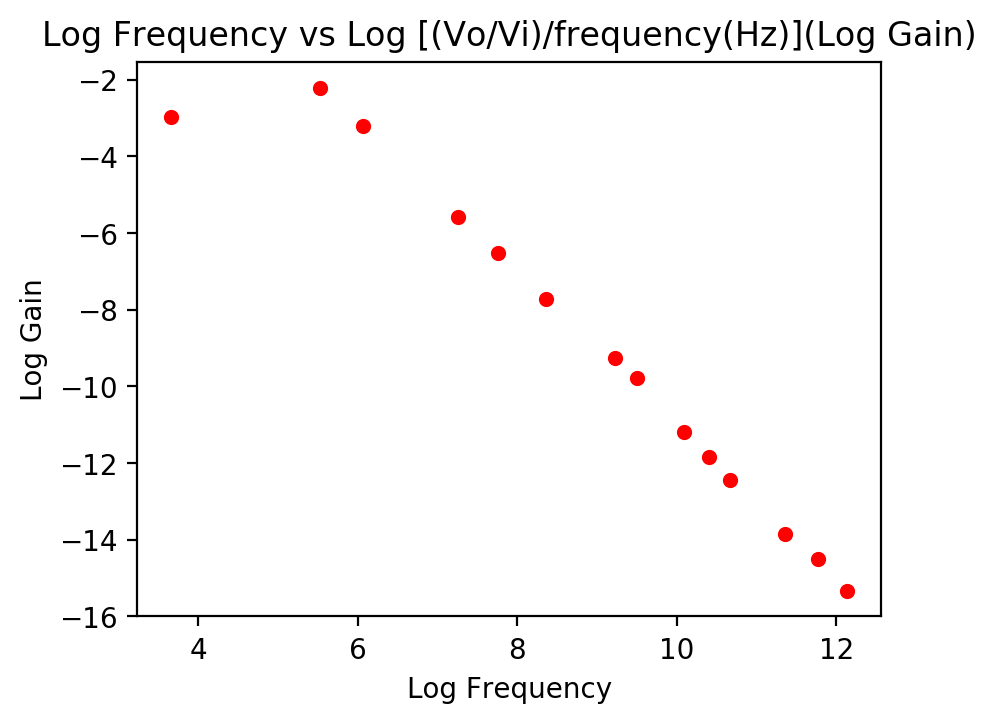

<Figure size 480x360 with 0 Axes>

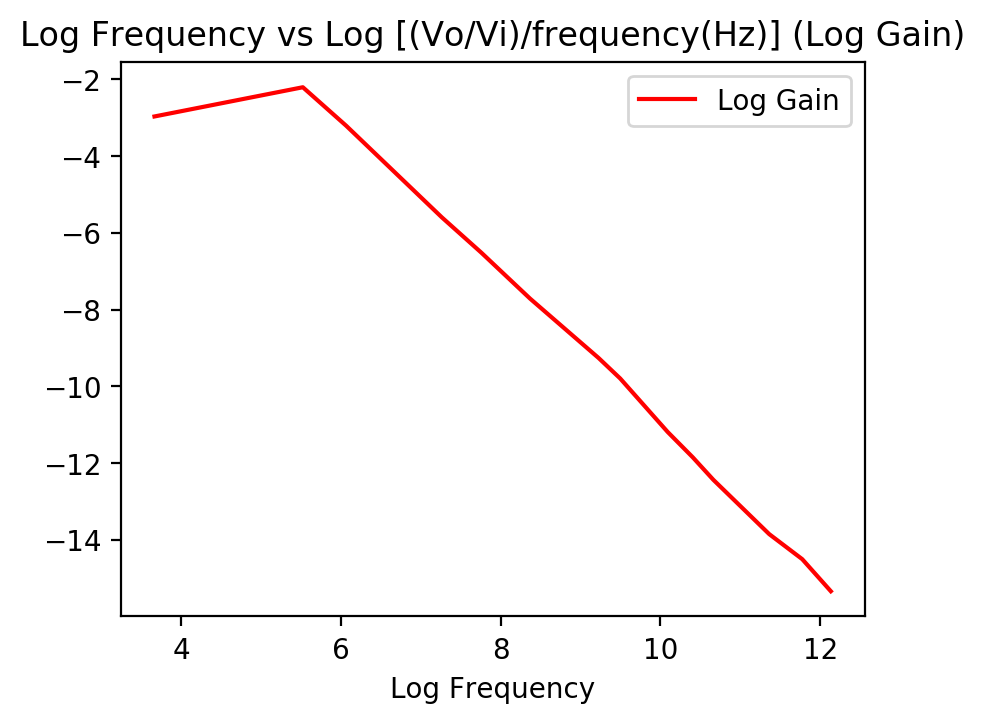

<Figure size 480x360 with 0 Axes>

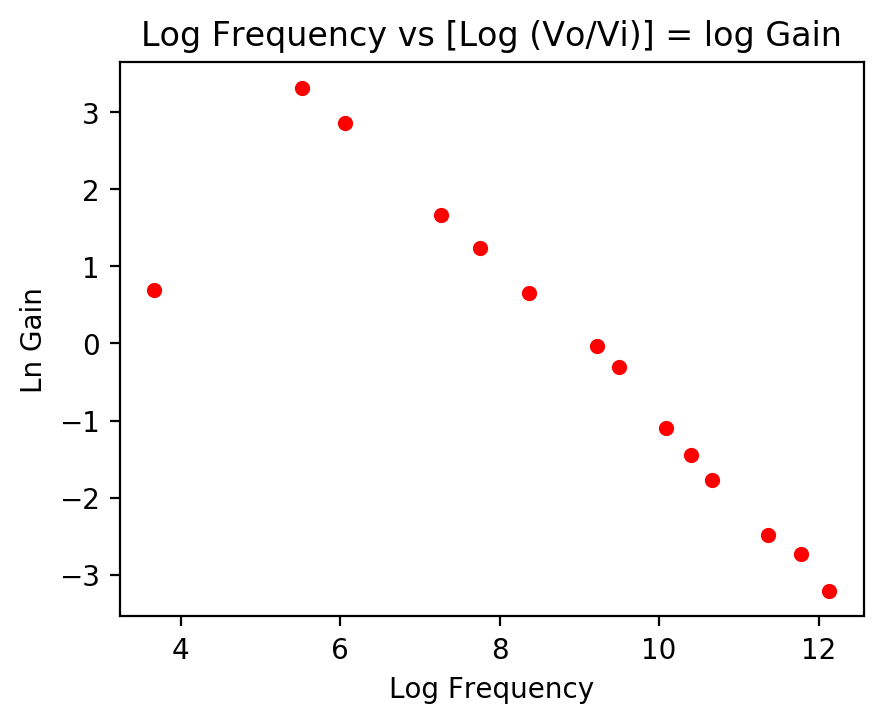

<Figure size 480x360 with 0 Axes>

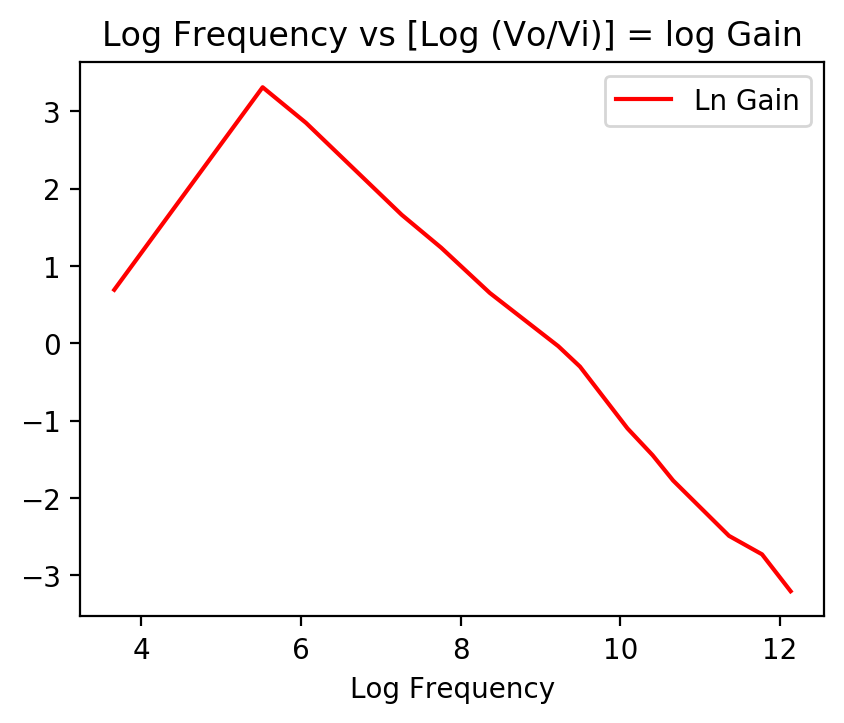

<Figure size 480x360 with 0 Axes>

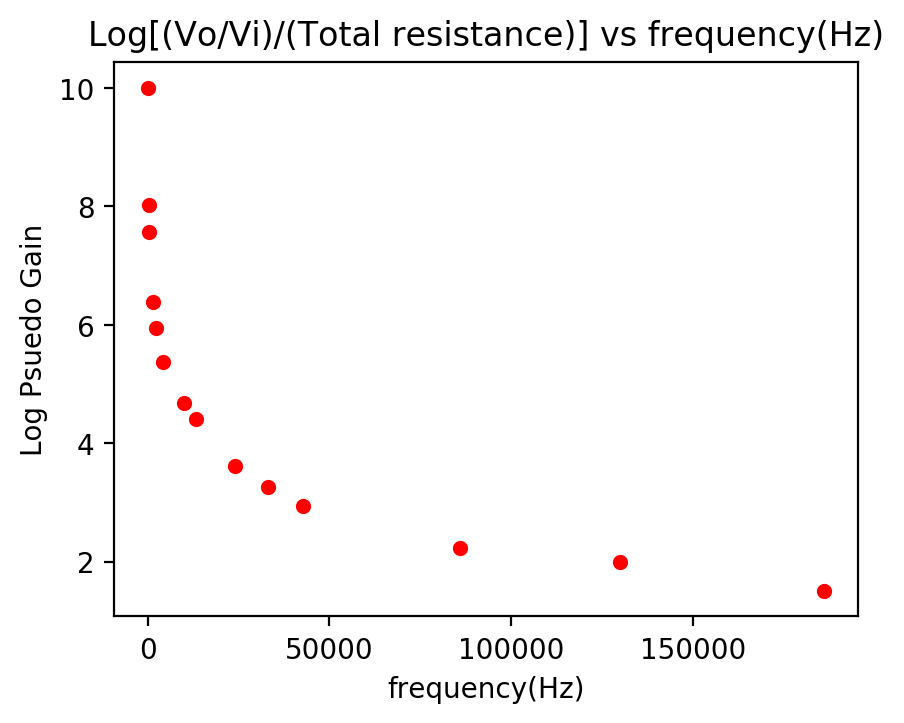

<Figure size 480x360 with 0 Axes>

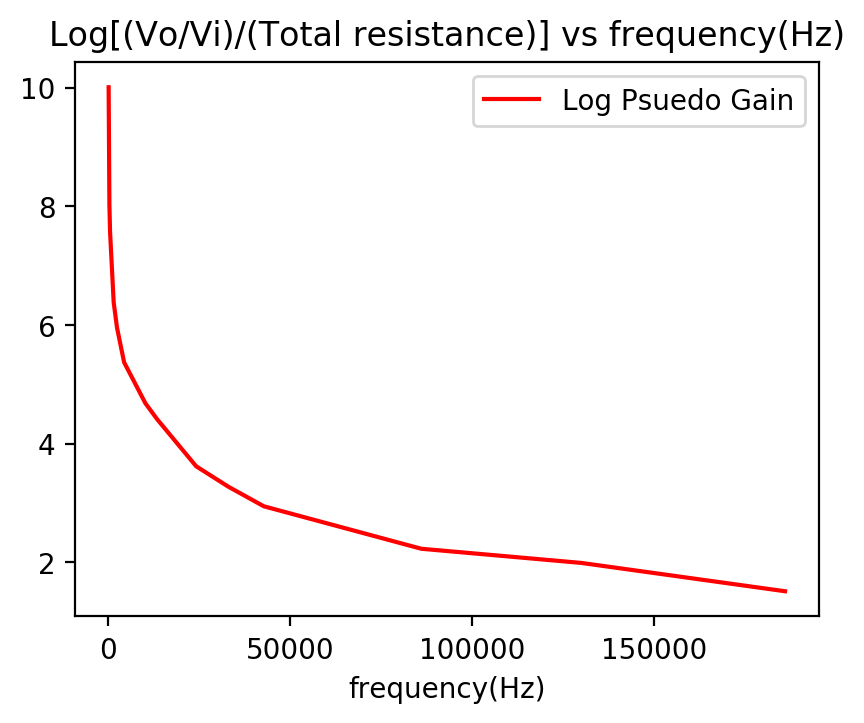

<Figure size 480x360 with 0 Axes>

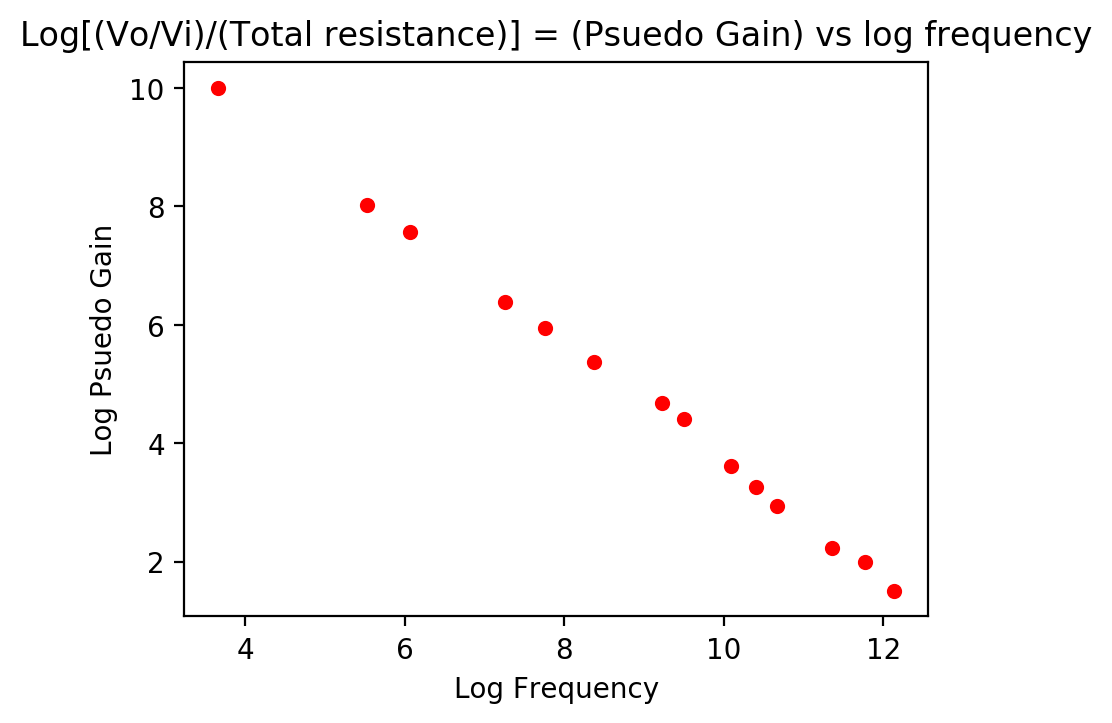

<Figure size 480x360 with 0 Axes>

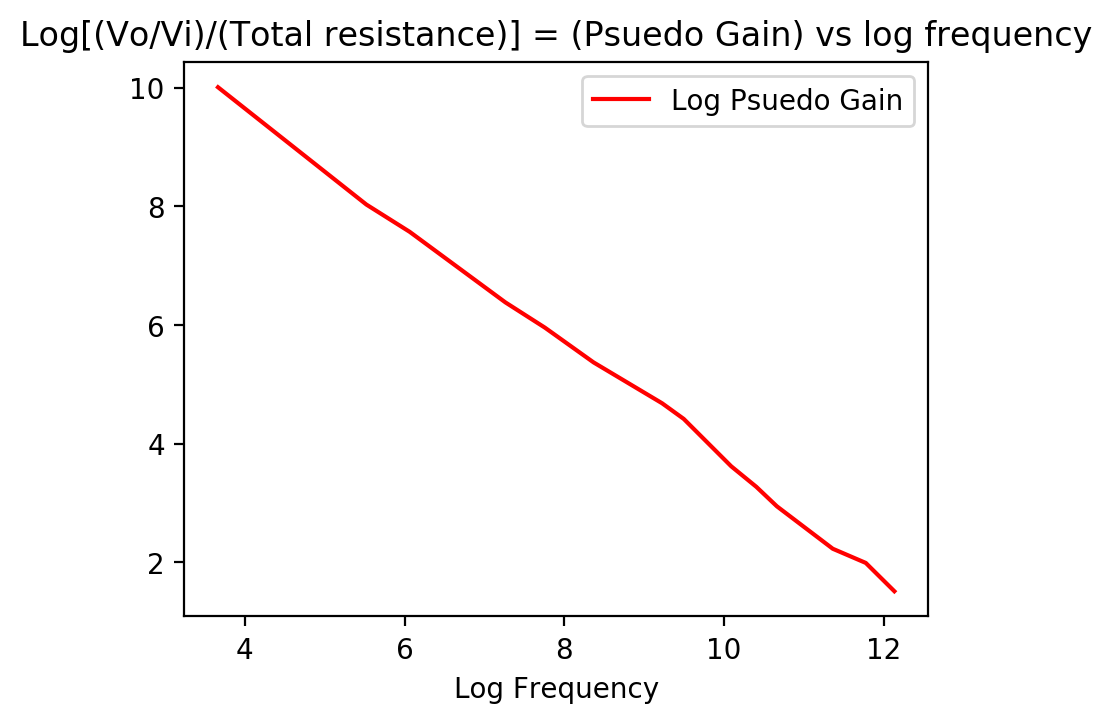

<Figure size 480x360 with 0 Axes>

In [2]:
# THESE LIBRARIES ARE NECESSARY FOR THINGS TO RUN
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy.optimize import curve_fit


from scipy import stats

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# NEXT WE HAVE WHERE WE INPUT OUR DATA. USING THE FOLLOWING LINES TO INPUT DATA TAKEN
# DO NOT DELETE THESE LINES

# F = [1425.0, 4300.0, 10140.0, 13300.0, 24100.0, 2337.0, 430.0, 250.0, 33000.0, 42700.0, 39.0, 186000.0, 130000.0, 86000.0] #ADD ALL FREQUENCY DATA IN HERTZ HERE... NOT KHz, NOT mHz, STR8 UP Hz

F = [39.0, 250.0, 430.0, 1425.0, 2337.0, 4300.0, 10140.0, 13300.0, 24100.0, 33000.0, 42700.0, 86000.0, 130000.0, 186000.0] # it is now in order


# Vi = [2.5, 2.5, 2.8, 2.16, 10.2, 3.45, 0.45, 0.47, 10.6, 10.6, 5.1, 10.6, 10.4, 10.6] #INPUT VOLTAGE IN VOLTS GOES HERE

Vi = [5.1, 0.47, 0.45, 2.5, 3.45, 2.5, 2.8, 2.16, 10.2, 10.6, 10.6, 10.6, 10.4, 10.6] # it is now in order

# Vo = [13.2, 4.8, 2.7, 1.6, 3.4, 11.9, 7.8, 12.9, 2.5, 1.8, 10.2, 0.43, 0.68, 0.88] #OUTPUT VOLTAGE IN VOLTS GOES HERE

Vo = [10.2, 12.9, 7.8, 13.2, 11.9, 4.8, 2.7, 1.6, 3.4, 2.5, 1.8, 0.88, 0.68, 0.43] # it is now in order

# PH = [0.000168, 5.9999999999999995e-05, 2.3e-05, 1.95e-05, 1.05e-05, 0.000109, 0.00057, 0.0009599999999999999, 7.8e-06, 5.400000000000001e-06, 0.0047, 1.24e-06, 1.82e-06, 2.85e-06]#PHASE SHIFT IN SECONDS GOES HERE

PH = [0.0047, 0.0009599999999999999, 0.00057, 0.000168, 0.000109, 5.9999999999999995e-05, 2.3e-05, 1.95e-05, 1.05e-05, 7.8e-06, 5.400000000000001e-06, 2.85e-06, 1.82e-06, 1.24e-06]

# 14 elements

R1 = [1000000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]

R2 = [90.3, 90.3, 90.3, 90.3, 90.3, 90.3, 90.3, 90.3, 90.3, 90.3, 90.3, 90.3, 90.3, 90.3]

R3 = [98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5]

# how did we calculate the phase shift from the difference in time?

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


#--------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# NOW WE MAKE A DATAFRAME WHICH IS EXACTLY WHAT IT SOUNDS LIKE. A FRAME OF DATA.
# DO NOT DELETE THESE LINES

df = pd.DataFrame(list(zip(F, Vi, Vo, PH, R1, R2, R3)), columns =['frequency(Hz)', 'Vi(V)', 'Vo(V)', 'Phase(s)', 'Resistance1', 'Resistance2', 'Resistance3' ]) #df IS THE NAME OF OUR DATAFRAME
# we have now named the columns so if we want to call on them this is what they are called now
# print(df) # TEST PRINT TO SEE THE DATAFRAME. NOTICE HOW IT IS A FRAME OF DATA\
# this prints out measurements that we had collected, our initial dataframe(df); frequencty, input voltage, output voltage, and phase shift

#IF YOU JUST WANT TO PRINT OUT A COLUMN USE THE FOLLOWING LINE:

# print(" ")
# print("Printing frequencies")
# print(df['frequency(Hz)'].values.tolist())

# print(" ")
# print("Printing input voltages")
# print(df['Vi(V)'].values.tolist())

# print(" ")
# print("Printing output voltages")
# print(df['Vo(V)'].values.tolist())

# print(" ")
# print("Printing phases")
# print(df['Phase(s)'].values.tolist())


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



#--------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# NOW LET US CALCULATE GAIN. RECALL GAIN = Vo/Vi.
# WE CAN USE NUMPY TO DO THIS QUICKLY AS HELL. WE CAN ACCESS A WHOLE COLUMN BY CALLING df["Column Name"]
GAIN = np.divide(df['Vo(V)'], df['Vi(V)'])# USING np.divide(array1, array2) we can divide every element
df['Gain']= GAIN # WE CAN NOW ADD A NEW COLUMN TO OUR DATAFRAME JUST BY SAYING df["Whatever Name you want"]= some_array[]
# print(" ")

# print(df) #NOTICE NOW HOW THE DATAFRAME HAS A LOG GAIN COLUMN WHEN WE PRINT IT OUT
# we have now included the column Gain to the df


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


#--------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# NOW LET US CALCULATE log(GAIN) = LOG(GAIN/FREQUENCY) <-------- SAW THIS ON THE BOARD SO I DONT KNOW IF IT IS RIGHT

# AGAIN, WE CAN USE NUMPY TO DO THIS QUICKLY AS HELL. WE CAN ACCESS A WHOLE COLUMN BY CALLING df["Column Name"]
df['Log Gain']= np.log(np.divide(df['Gain'], df['frequency(Hz)']))
# print(" ")

# print(df) #NOTICE NOW HOW THE DATAFRAME HAS A LOG_FREAK COLUMN WHEN WE PRINT IT OUT

# omar put the following in

# AGAIN, WE CAN USE NUMPY TO DO THIS QUICKLY AS HELL. WE CAN ACCESS A WHOLE COLUMN BY CALLING df["Column Name"]
df['Ln Gain']= np.log(df['Gain'])
# print(" ")

# print(df) #NOTICE NOW HOW THE DATAFRAME HAS A LOG_FREAK COLUMN WHEN WE PRINT IT OUT







# NOW LET US CALCULATE log(FREQUENCY) <-------- SAW THIS ON THE BOARD SO I DONT KNOW IF IT IS RIGHT
# AGAIN, WE CAN USE NUMPY TO DO THIS QUICKLY AS HELL. WE CAN ACCESS A WHOLE COLUMN BY CALLING df["Column Name"]
df['Log Frequency']= np.log(df['frequency(Hz)'])
# print(" ")
# print(df) #NOTICE NOW HOW THE DATAFRAME HAS A LOG_FREAK COLUMN WHEN WE PRINT IT OUT




# Omar put the following in

#  we are trying to find the resistance

# NOW LET US CALCULATE Total Resistance (RT) 
# AGAIN, WE CAN USE NUMPY TO DO THIS QUICKLY AS HELL. WE CAN ACCESS A WHOLE COLUMN BY CALLING df["Column Name"]
df['Total Resistance']= np.divide(df['Resistance2'], (np.add(df['Resistance1'], df['Resistance2'])))
print(" ")
# print(df) #NOTICE NOW HOW THE DATAFRAME HAS A LOG_FREAK COLUMN WHEN WE PRINT IT OUT

# I dont need log total resistance im just getting desperate

# NOW LET US CALCULATE Log (Total Resistance (RT)) 
# AGAIN, WE CAN USE NUMPY TO DO THIS QUICKLY AS HELL. WE CAN ACCESS A WHOLE COLUMN BY CALLING df["Column Name"]
# df['Log Total Resistance']= np.log(np.divide(df['Resistance2'], (np.add(df['Resistance1'], df['Resistance2']))))
# print(" ")
# print(df) #NOTICE NOW HOW THE DATAFRAME HAS A LOG_FREAK COLUMN WHEN WE PRINT IT OUT

# NOW LET US CALCULATE Psuedo Gain 
# AGAIN, WE CAN USE NUMPY TO DO THIS QUICKLY AS HELL. WE CAN ACCESS A WHOLE COLUMN BY CALLING df["Column Name"]
df['Psuedo Gain']= np.divide(df['Gain'], (df['Total Resistance']))
print(" ")
print(df) #NOTICE NOW HOW THE DATAFRAME HAS A PSUEDO GAIN COLUMN WHEN WE PRINT IT OUT

# NOW LET US CALCULATE Psuedo Gain 
# AGAIN, WE CAN USE NUMPY TO DO THIS QUICKLY AS HELL. WE CAN ACCESS A WHOLE COLUMN BY CALLING df["Column Name"]
df['Log Psuedo Gain']= np.log(np.divide(df['Gain'], (df['Total Resistance'])))
print(" ")
print(df) #NOTICE NOW HOW THE DATAFRAME HAS A Log PSUEDO GAIN COLUMN WHEN WE PRINT IT OUT




# SORTED THE VALUES BECAUSE IT MAKES MORE SENSE
# by sort we mean were ordering the frequencies from lowest to longest
df = df.sort_values(['frequency(Hz)'])
print(df)






# Omar put the following in

# when these are printed these will now be in order

# print(" ")
# print("Printing frequencies")
# print(df['frequency(Hz)'].values.tolist())

# print(" ")
# print("Printing input voltages")
# print(df['Vi(V)'].values.tolist())

# print(" ")
# print("Printing output voltages")
# print(df['Vo(V)'].values.tolist())

# print(" ")
# print("Printing phases")
# print(df['Phase(s)'].values.tolist())








# PLOTTING IS ALSO WAY EASIER, ALL YOU GOTTA DO IS SET X AXIS TO A COLUMN NAME, AND Y TO COLUMN NAME AND THEN BAM. DONE
df.plot(kind='scatter',x='Log Frequency',y='Log Gain',color='red')
plt.title('Log Frequency vs Log [(Vo/Vi)/frequency(Hz)](Log Gain)')
plt.show()
plt.clf()

# FOR kind = '' you can pick whether you want a line plot or a scatter plot as seen below
df.plot(kind='line',x='Log Frequency',y='Log Gain',color='red')
plt.title('Log Frequency vs Log [(Vo/Vi)/frequency(Hz)] (Log Gain)')
plt.show()
plt.clf()









# # Omar put the following in

# it didnt make sense to me to divide gain by the frequency so i did log (Vo/Vi)

# PLOTTING IS ALSO WAY EASIER, ALL YOU GOTTA DO IS SET X AXIS TO A COLUMN NAME, AND Y TO COLUMN NAME AND THEN BAM. DONE
df.plot(kind='scatter',x='Log Frequency',y='Ln Gain',color='red')
plt.title('Log Frequency vs [Log (Vo/Vi)] = log Gain')
plt.show()
plt.clf()

# FOR kind = '' you can pick whether you want a line plot or a scatter plot as seen below
df.plot(kind='line',x='Log Frequency',y='Ln Gain',color='red')
plt.title('Log Frequency vs [Log (Vo/Vi)] = log Gain')
plt.show()
plt.clf()








# remember when we were trying to figure out the what gain we wanted, it was Vo = Vi (R2/R1+R2) A, i just used that idea to determine "gain" cuz idk what is going on i called it fake gain

# PLOTTING IS ALSO WAY EASIER, ALL YOU GOTTA DO IS SET X AXIS TO A COLUMN NAME, AND Y TO COLUMN NAME AND THEN BAM. DONE
df.plot(kind='scatter',y='Log Psuedo Gain',x='frequency(Hz)',color='red')
plt.title('Log[(Vo/Vi)/(Total resistance)] vs frequency(Hz)')
plt.show()
plt.clf()

# slope, intercept, r_value, p_value, std_err = stats.linregress(x='Total Resistance',y='Gain')
# print("Slope is ", slope)
# print("Intercept is ", intercept)
# print("R value is ", r_value)
# print("P value is ", p_value)
# print("Standard Error is ", std_err)


# FOR kind = '' you can pick whether you want a line plot or a scatter plot as seen below
df.plot(kind='line',y='Log Psuedo Gain',x='frequency(Hz)',color='red')
plt.title('Log[(Vo/Vi)/(Total resistance)] vs frequency(Hz)')
plt.show()
plt.clf()

# slope, intercept, r_value, p_value, std_err = stats.linregress(x='Total Resistance',y='Gain')
# print("Slope is ", slope)
# print("Intercept is ", intercept)
# print("R value is ", r_value)
# print("P value is ", p_value)
# print("Standard Error is ", std_err)





# i copied what you had done with the log gain vs log frequency


# PLOTTING IS ALSO WAY EASIER, ALL YOU GOTTA DO IS SET X AXIS TO A COLUMN NAME, AND Y TO COLUMN NAME AND THEN BAM. DONE
df.plot(kind='scatter',y='Log Psuedo Gain',x='Log Frequency',color='red')
plt.title('Log[(Vo/Vi)/(Total resistance)] = (Psuedo Gain) vs log frequency')
plt.show()
plt.clf()

# slope, intercept, r_value, p_value, std_err = stats.linregress(x='Total Resistance',y='Gain')
# print("Slope is ", slope)
# print("Intercept is ", intercept)
# print("R value is ", r_value)
# print("P value is ", p_value)
# print("Standard Error is ", std_err)


# FOR kind = '' you can pick whether you want a line plot or a scatter plot as seen below
df.plot(kind='line',y='Log Psuedo Gain',x='Log Frequency',color='red')
plt.title('Log[(Vo/Vi)/(Total resistance)] = (Psuedo Gain) vs log frequency')
plt.show()
plt.clf()

# slope, intercept, r_value, p_value, std_err = stats.linregress(x='Total Resistance',y='Gain')
# print("Slope is ", slope)
# print("Intercept is ", intercept)
# print("R value is ", r_value)
# print("P value is ", p_value)
# print("Standard Error is ", std_err)

